**1. Implement Naive Bayes Classifier algorithm without using inbuilt functions.**

dataset = {'Taste':['Salty','Spicy','Spicy','Spicy','Spicy','Sweet','Salty','Sweet','Spicy','Salty'],

'Temperature':['Hot','Hot','Hot','Cold','Hot','Cold','Cold','Hot','Cold','Hot'],

'Texture':['Soft','Soft','Hard','Hard','Hard','Soft','Soft','Soft','Soft','Hard'],

'Eat':['No','No','Yes','No','Yes','Yes','No','Yes','Yes','Yes']}


In [14]:
# import pandas as pd
# import numpy as np

# # Step 0: Dataset
# dataset = {
#     'Taste': ['Salty', 'Spicy', 'Spicy', 'Spicy', 'Spicy', 'Sweet', 'Salty', 'Sweet', 'Spicy', 'Salty'],
#     'Temperature': ['Hot', 'Hot', 'Hot', 'Cold', 'Hot', 'Cold', 'Cold', 'Hot', 'Cold', 'Hot'],
#     'Texture': ['Soft', 'Soft', 'Hard', 'Hard', 'Hard', 'Soft', 'Soft', 'Soft', 'Soft', 'Hard'],
#     'Eat': ['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes']
# }
# df = pd.DataFrame(dataset)

# # Step 1: Calculate priors
# def calculate_priors(df, target_column):
#     vals, counts = np.unique(df[target_column], return_counts=True)
#     total = np.sum(counts)
#     priors = {vals[i]: counts[i] / total for i in range(len(vals))}
#     return priors

# # Step 2: Calculate likelihoods
# def calculate_likelihood(df, feature_columns, target_column="Eat"):
#     likelihoods = {}
#     for feature in feature_columns:
#         likelihoods[feature] = {}
#         for feature_value in df[feature].unique():
#             likelihoods[feature][feature_value] = {}
#             for target_class in df[target_column].unique():
#                 num = len(df[(df[feature] == feature_value) & (df[target_column] == target_class)])
#                 denom = len(df[df[target_column] == target_class])
#                 likelihoods[feature][feature_value][target_class] = num / denom if denom > 0 else 0.0
#     return likelihoods

# # Step 3: Predict using Naive Bayes
# def predict(query, priors, likelihoods, classes):
#     posteriors = {}
#     for cls in classes:
#         prob = priors[cls]
#         for feature, value in query.items():
#             prob *= likelihoods.get(feature, {}).get(value, {}).get(cls, 1e-6)  # 1e-6 = small default if unseen
#         posteriors[cls] = prob
#     return max(posteriors, key=posteriors.get), posteriors

# # Step 4: Training
# features = ['Taste', 'Temperature', 'Texture']
# target = 'Eat'
# priors = calculate_priors(df, target)
# likelihoods = calculate_likelihood(df, features, target)

# # Step 5: Test
# test_input = {'Taste': 'Spicy', 'Temperature': 'Cold', 'Texture': 'Soft'}
# prediction, probabilities = predict(test_input, priors, likelihoods, df[target].unique())

# # Step 6: Output
# print("🔍 Test Input:", test_input)
# print("✅ Predicted Class:", prediction)
# print("📊 Posterior Probabilities:", probabilities)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = {
    'Taste': ['Salty', 'Spicy', 'Spicy', 'Spicy', 'Spicy', 'Sweet', 'Salty', 'Sweet', 'Spicy', 'Salty'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Cold', 'Hot', 'Cold', 'Cold', 'Hot', 'Cold', 'Hot'],
    'Texture': ['Soft', 'Soft', 'Hard', 'Hard', 'Hard', 'Soft', 'Soft', 'Soft', 'Soft', 'Hard'],
    'Eat': ['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes']
}
df = pd.DataFrame(dataset)

def calculate_priors(df,target_col):
    values,counts=np.unique(df[target_col],return_counts=True)
    total=np.sum(counts)
    priors={
        values[i]:counts[i]/total 
        for i in range(len(values))
    }
    return priors

def calculate_likelihoods(data,target_col,features):
    likelihood={}
    for feature in features:
        likelihood[feature]={}
        for val in np.unique(df[feature]):
            likelihood[feature][val]={}
            for cls in np.unique(df[target_col]):
                num=len(df[(df[feature]==val) & (df[target_col]==cls)])
                den=len(df[df[target_col]==cls])
                # prob=len(num)/len(den)
                likelihood[feature][val][cls]=(num/den) if den>=0 else 0.0
    return likelihood

def predict(query,prior,likelihood):
    prob_class={}
    for cls,prob in prior.items():
        post=prob
        for feature,val in query.items():
            post*=likelihood[feature][val].get(cls,1e-6)
        prob_class[cls]=post
    best_class=max(prob_class,key=prob_class.get)
    return best_class,prob_class



features = ['Taste', 'Temperature', 'Texture']
target = 'Eat'
priors = calculate_priors(df, target)
likelihoods = calculate_likelihoods(df,  target,features)

# Step 5: Test
test_input = {'Taste': 'Spicy', 'Temperature': 'Cold', 'Texture': 'Soft'}
prediction, probabilities = predict(test_input, priors, likelihoods)

# Step 6: Output
print("🔍 Test Input:", test_input)
print("✅ Predicted Class:", prediction)
print("📊 Posterior Probabilities:", probabilities)
    


🔍 Test Input: {'Taste': 'Spicy', 'Temperature': 'Cold', 'Texture': 'Soft'}
✅ Predicted Class: No
📊 Posterior Probabilities: {'No': 0.07500000000000001, 'Yes': 0.049999999999999996}


**2. Implement Decision tree on IRIS Dataset using SK Learn library functions. Implement methods to avoid over-fitting of the data.**

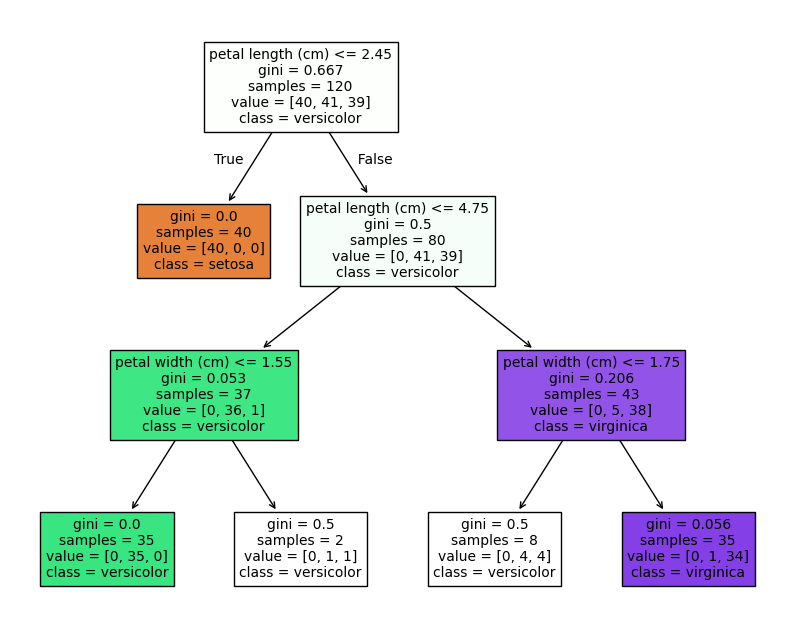

1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier,plot_tree
# from sklearn.metrics import accuracy_score,classification_report
# import matplotlib.pyplot as plt

# iris=load_iris()



# X=iris.data
# Y=iris.target

# X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# model=DecisionTreeClassifier(
#     criterion='gini',
#     max_depth=3,
#     min_samples_split=4,
#     min_samples_leaf=2,
#     random_state=42
# )

# model.fit(X_train,Y_train)


# Y_pred=model.predict(X_test)
# accuracy = accuracy_score(Y_test, Y_pred)
# report = classification_report(Y_test, Y_pred, target_names=iris.target_names)

# # Plot the tree
# plt.figure(figsize=(12, 6))
# plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
# plt.title("Decision Tree on IRIS Dataset (with overfitting control)")
# plt.show()

# accuracy, report

from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris=load_iris()

X=iris.data
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier(
    criterion='gini',
    min_samples_leaf=2,
    min_samples_split=4,
    max_depth=3,
    random_state=42
)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
class_report=classification_report(y_test,y_pred,target_names=iris.target_names)

plt.figure(figsize=(10,8))
plot_tree(model,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

print(acc)
print(class_report)